In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from matplotlib import cm
import lightkurve as lk
from scipy import interpolate


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

Plot of some M dwarfs

In [1]:
# plt.figure(figsize=(8.5, 8.5))
# path = '/media/david/1tb_storage1/emergency_data/PyHammer-2.0.0/resources/templates/'
# sptypes = ['M0', 'M2', 'M4', 'M6', 'M8']
# nspec = len(sptypes) 
# cols = np.linspace(0, 1, nspec)

# for i, sptype in enumerate(sptypes):
#         specs = glob.glob('{}{}_+0.0_Dwarf.fits'.format(path, sptype))+glob.glob('{}{}.fits'.format(path, sptype))
#         if len(specs) > 0 :
#             data = fits.getdata(specs[0])
#             w, f = 10**data['Loglam'], data['Flux']
#             mask = (w < 9350) | (w > 9450)
#             f = f/np.max(data['Flux'][mask])+nspec-i
#             plt.plot(w, f)#, plt.cm.cool(cols[i]))
#             labpos= (np.mean(f[(w > 9500) & (w < 10000)]))+0.2 #position of the label just above the spectrum

#             plt.annotate(sptype, (0.9, labpos), xycoords=('axes fraction', 'data'), ha='left', va='bottom')
# plt.xlim(w[0], w[-1])

# plt.xlabel('Wavelength (\AA)', size=20)
# plt.ylabel('Normalised Flux+constant', size=20)
# plt.tight_layout()
# plt.savefig('plots/mdwarf_specs.png', facecolor='w', dpi=150)

In [4]:
from scipy.io.idl import readsav

sol_spec =  readsav('../../stuff/Solar-data.idlsav')

sw = sol_spec['wave']*10
sf = sol_spec['flux']*100

In [5]:
r_t1 = 0.117*u.Rsun
r_674 = 0.35*u.Rsun
t_t1= 2560*u.K
t_674 = 3400*u.K
t_sun = 5777*u.K
d_sun = (1*u.au).to(u.pc)
d_674= 6.4*u.pc
# bb_scale = (u.Rsun**2 * t_sun**4)/(r_t1**2 * t_t1**4)*(d_t1/d_sun)**2
bb_scale = (u.Rsun**2 * t_sun**4)/(r_674**2 * t_674**4)*(d_674/d_sun)**2
print(bb_scale)

118568118309998.17


In [2]:
# path = '/media/david/1tb_storage1/emergency_data/mega_muscles/v02_seds/'
path = '/media/david/2tb_ext_hd/hddata/mega_muscles/v02_seds/'
specs = glob.glob('{}*adapt-var*'.format(path))
specs

['/media/david/2tb_ext_hd/hddata/mega_muscles/v02_seds/hlsp_muscles_multi_multi_gj676a_broadband_v2_adapt-var-res-sed.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v02_seds/hlsp_muscles_multi_multi_gj1132_broadband_v2_adapt-var-res-sed.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v02_seds/hlsp_muscles_multi_multi_gj15a_broadband_v2_adapt-var-res-sed.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v02_seds/hlsp_muscles_multi_multi_gj163_broadband_v2_adapt-var-res-sed.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v02_seds/hlsp_muscles_multi_multi_gj649_broadband_v2_adapt-var-res-sed.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v02_seds/hlsp_muscles_multi_multi_gj674_broadband_v2_adapt-var-res-sed.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v02_seds/hlsp_muscles_multi_multi_gj699_broadband_v2_adapt-var-res-sed.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v02_seds/hlsp_muscles_multi_multi_gj729_broadband_v2_adapt-var-res-sed.fits',
 '/med

In [8]:
stars = []


for j, spec in enumerate(specs):
    
#     print(spec)
#     plt.figure(figsize = (4*len(doublets), 10))
#     gs = GridSpec(2, 4)
    data = fits.getdata(spec, 1)
    star = fits.getheader(spec)['TARGNAME']
#     if star=='GJ674':
    print(star)
    stars.append(star)
#         w, f, e, inst = data['WAVELENGTH'], data['FLUX'], data['ERROR'], data['INSTRUMENT']
# #         wn, fn, en = remove_negatives(w, f, e)
#         plt.plot(w[w< 4000], f[w< 4000])    
#         plt.plot(wn[wn< 4000], fn[wn< 4000])
#         plt.yscale('log')
#         plt.show()
    

GJ1132
GJ15A
GJ163
GJ649
GJ674
GJ676A
GJ699
GJ729
GJ849
L-980-5
LHS-2686
2MASS-J23062928-0502285


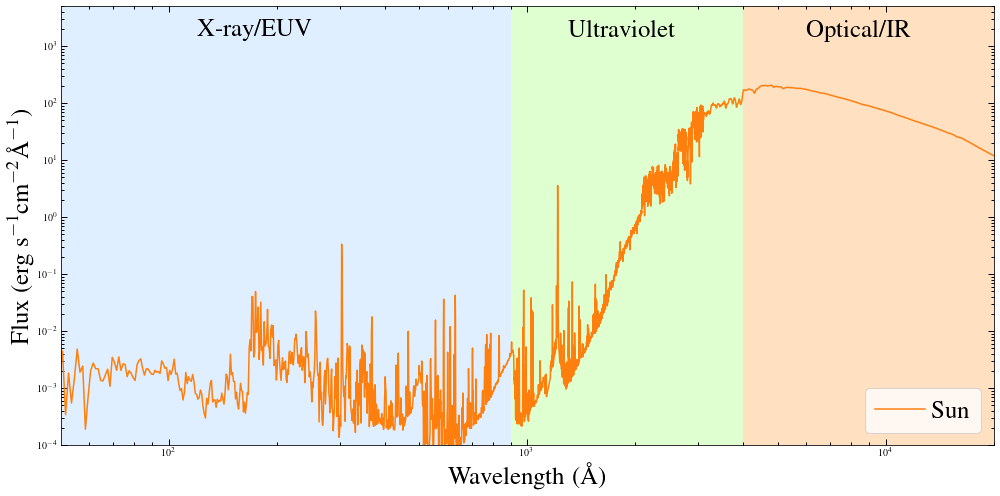

In [10]:
plt.figure(figsize=(14, 7))


plt.plot(sw, sf, c='C1', label = 'Sun')
# plt.plot(wn, fn*bb_scale, c='C3', label = 'GJ674 (M3)')
plt.xlim(50.1, 20000)
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-4, 5e3)

plt.fill_between([0,900],0,10000, facecolor='#99ccff',alpha =0.3)
#plt.annotate('Thermosphere heating/removal', (12, 1e-12))

plt.fill_between([900,4000],0,10000, facecolor='#99ff66', alpha =0.3)

# plt.fill_between([2000,4000],0,10000, facecolor='#ffff99',alpha =0.5)
#plt.annotate(' Photochemistry', (900, 1e-13))

plt.fill_between([4000,60000],0,10000, facecolor='#ff9933',alpha =0.3)
#plt.annotate('Atmosphere \& surface heating', (4100, 1e-12))

 
bar_y = 1e3
label_y = bar_y*1.5
e_y = bar_y *0.3
# plt.errorbar((5,50),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# plt.annotate('XMM', (10, label_y))

# plt.errorbar((50,100),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# plt.annotate('APEC', (75, label_y), ha='center')

# plt.errorbar((100,1060),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# plt.annotate('EUV Model', (350, label_y), ha='center')

# plt.errorbar((1068, 5692),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# plt.annotate('HST', (1900, label_y))

# plt.errorbar((5692, 25000),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# plt.annotate('PHOENIX', (8000, label_y))
plt.annotate('X-ray/EUV' ,(120, label_y), size=25)
plt.annotate('Ultraviolet' ,(1300, label_y), size=25)
plt.annotate('Optical/IR' ,(6000, label_y), size=25)

plt.xlabel('Wavelength (\AA)', size=25)
plt.ylabel('Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=25)
plt.legend(fontsize=25, loc=4,frameon=True)
plt.tight_layout()
# plt.savefig('plots/just_sun.png', dpi=150, facecolor='w')
# plt.savefig('plots/gj674_sun.png', dpi=150, facecolor='w')


In [11]:
# plt.figure(figsize=(14, 7))


# # plt.plot(sw, sf, c='C1', label = 'Sun')
# plt.plot(wn, fn)#, c='C3', label = 'GJ674 (M3)')
# plt.xlim(5, 100000)
# plt.yscale('log')
# plt.xscale('log')
# plt.ylim(1.1e-18, 9.9e-12)

# # plt.fill_between([0,900],0,10000, facecolor='#99ccff',alpha =0.3)
# # #plt.annotate('Thermosphere heating/removal', (12, 1e-12))

# # plt.fill_between([900,4000],0,10000, facecolor='#99ff66', alpha =0.3)

# # # plt.fill_between([2000,4000],0,10000, facecolor='#ffff99',alpha =0.5)
# # #plt.annotate(' Photochemistry', (900, 1e-13))

# # plt.fill_between([4000,60000],0,10000, facecolor='#ff9933',alpha =0.3)
# # #plt.annotate('Atmosphere \& surface heating', (4100, 1e-12))

 
# # bar_y = 1e3
# # label_y = bar_y*1.5
# # e_y = bar_y *0.3
# # # plt.errorbar((5,50),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# # # plt.annotate('XMM', (10, label_y))

# # # plt.errorbar((50,100),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# # # plt.annotate('APEC', (75, label_y), ha='center')

# # # plt.errorbar((100,1060),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# # # plt.annotate('EUV Model', (350, label_y), ha='center')

# # # plt.errorbar((1068, 5692),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# # # plt.annotate('HST', (1900, label_y))

# # # plt.errorbar((5692, 25000),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# # # plt.annotate('PHOENIX', (8000, label_y))
# # plt.annotate('X-ray/EUV' ,(120, label_y), size=25)
# # plt.annotate('Ultraviolet' ,(1300, label_y), size=25)
# # plt.annotate('Optical/IR' ,(6000, label_y), size=25)

# plt.xlabel('Wavelength (\AA)', size=25)
# plt.ylabel('Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=25)
# # plt.legend(fontsize=25, loc=4,frameon=True)
# plt.tight_layout()
# # plt.savefig('plots/just_sun.png', dpi=150, facecolor='w')
# plt.savefig('plots/gj674_clean_png', dpi=150, facecolor='w')


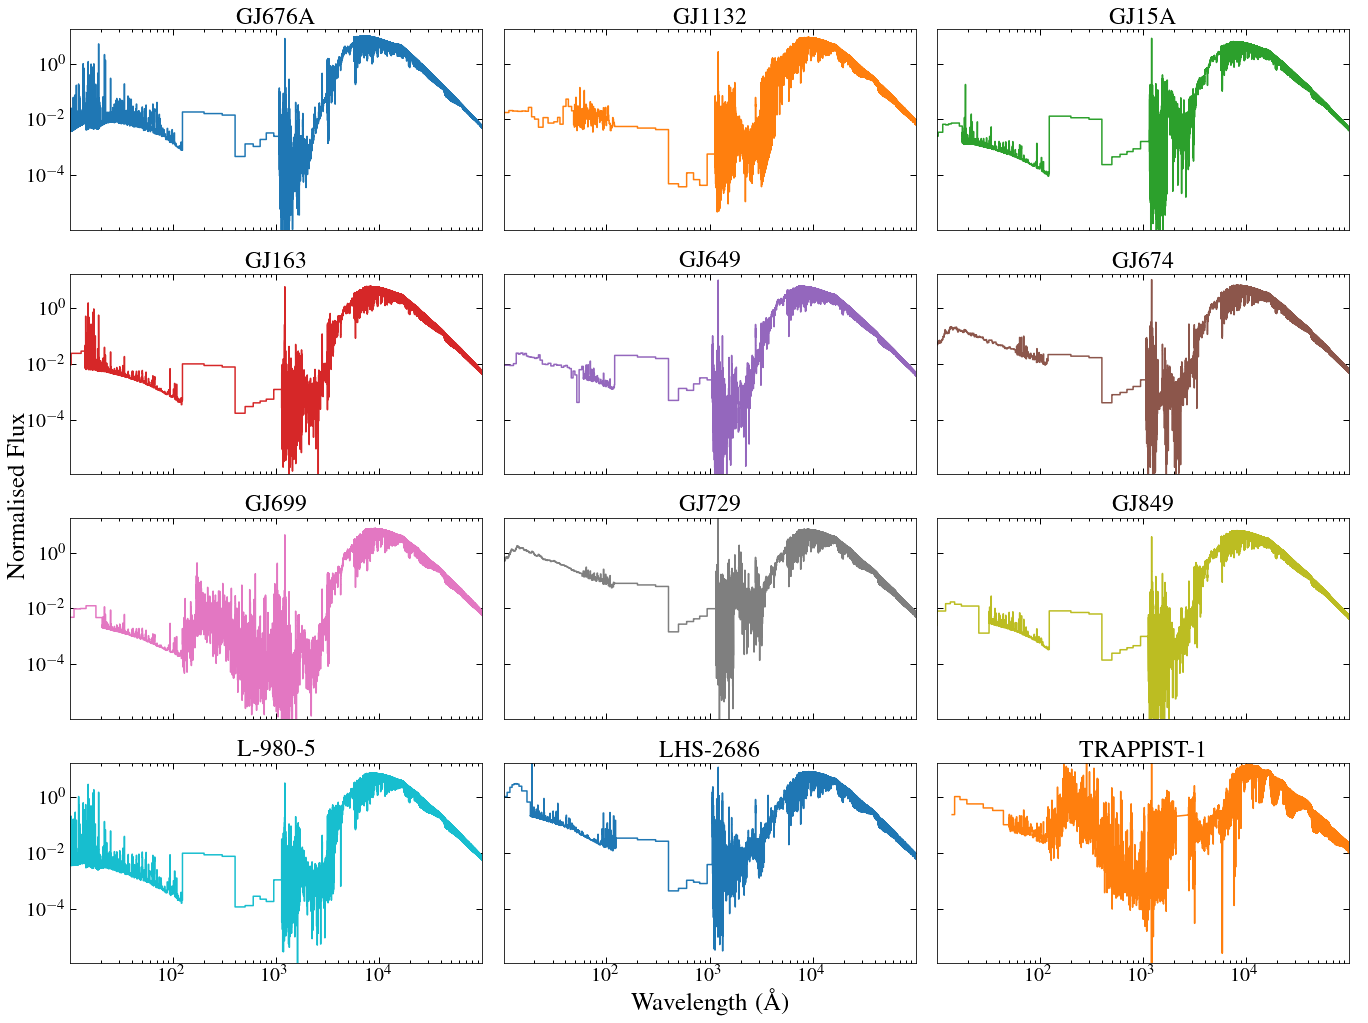

In [11]:
# import mplcyberpunk
# plt.style.use("cyberpunk")

# fig = plt.figure(figsize=(20, 15))
fig, axes = plt.subplots(4, 3,  sharex=True, sharey=True,figsize=(20,15))

for j, spec in enumerate(specs):
    
#     print(spec)
#     plt.figure(figsize = (4*len(doublets), 10))
#     gs = GridSpec(2, 4)
    plt.subplot(4, 3, j+1)
    data = fits.getdata(spec, 1)
    star = fits.getheader(spec)['TARGNAME']
    # boloflux = fits.getheader(spec)['BOLOFLUX']
#     print(star)
#     stars.append(star)
    w, f, e, inst = data['WAVELENGTH'], data['FLUX'], data['ERROR'], data['INSTRUMENT']
#     wn, fn, en = remove_negatives(w, f, e)
#         plt.plot(w[w< 4000], f[w< 4000])    
    plt.step(w, f/np.median(f), c='C{}'.format(j), where='mid')
    # plt.step(w, f/boloflux, c='C{}'.format(j))
    plt.yscale('log')
    plt.xscale('log')
    plt.xlim(10.1, 99999.9)
    plt.ylim(1.1e-6, 1.7e1)
#     mplcyberpunk.add_glow_effects()
    if star == '2MASS-J23062928-0502285':
        star = 'TRAPPIST-1'
    plt.title(star)
#     if j == 3:
#         plt.ylabel('Normalised Flux', size=25)
#     if j == 10:
#         plt.xlabel('Wavelength (\AA)', size=25)

fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
plt.ylabel('Normalised Flux', size=25, labelpad=12)
plt.xlabel('Wavelength (\AA)', size=25)
plt.tight_layout()
# plt.subplots_adjust(left=)

plt.savefig('plots/gallery.png', dpi=150, facecolor='w')
plt.savefig('plots/gallery.pdf', dpi=150, facecolor='w')
# plt.savefig('plots/gallery_cp.png', dpi=150)
#     plt.show()

Habitable zones

In [80]:
habz = np.loadtxt('HZs.dat')

In [32]:
starsdata = Table.read('../../../stars_table/EEM_dwarf_UBVIJHK_colors_Teff_fixed.csv', format='csv')
tstars, lstars = starsdata['Teff'], 10**starsdata['logL']
li = interpolate.interp1d(tstars, lstars)

In [49]:
mm_params = Table.read('../optical/stellar_parameters.csv')
mm_params.dtype.names

('Target',
 'RAJ2000',
 'DEJ2000',
 'Jmag',
 'J_e',
 'Hmag',
 'H_e',
 'Kmag',
 'K_e',
 'Rmag',
 'R_e',
 'spt',
 'L_bol',
 'L_bol_e',
 'Mass',
 'Mass_e',
 'Radius',
 'Radius_e',
 'Teff',
 'Teff_e',
 'parallax',
 'distance',
 'P_rot_d')

In [101]:
planet_m = {'GJ 676A':[4.4, 11.5, 2127, 2161], 'GJ 15A':[ 5.35], 'GJ 649':[87.4], 'GJ 674':[11.1], 'GJ 163':[10.6, 6.8, 29.0],
           'GJ 1132':[1.66,2.64], 'GJ 849':[283, 342.9], 'Trappist-1':[1.017, 1.156, 0.297,0.772, 0.934,1.148, 0.331]} 

planet_a = {'GJ 676A':[0.04, 0.187, 1.8152,6.6], 'GJ 15A':[ 0.072], 'GJ 649':[1.13], 'GJ 674':[0.039], 'GJ 163':[0.061, 0.125, 1.03],
           'GJ 1132':[0.0153,0.0476], 'GJ 849':[2.409, 4.974], 'Trappist-1':[0.011, 0.015, 0.022,0.029, 0.039,0.047, 0.062]} 

/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:85: UserWarning: AutoMinorLocator does not work with logarithmic scale
/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:86: UserWarning: AutoMinorLocator does not work with logarithmic scale
/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:86: UserWarning: AutoMinorLocator does not work with logarithmic scale
/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:87: UserWarning: AutoMinorLocator does not work with logarithmic scale
/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/pylabtools.py:131: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


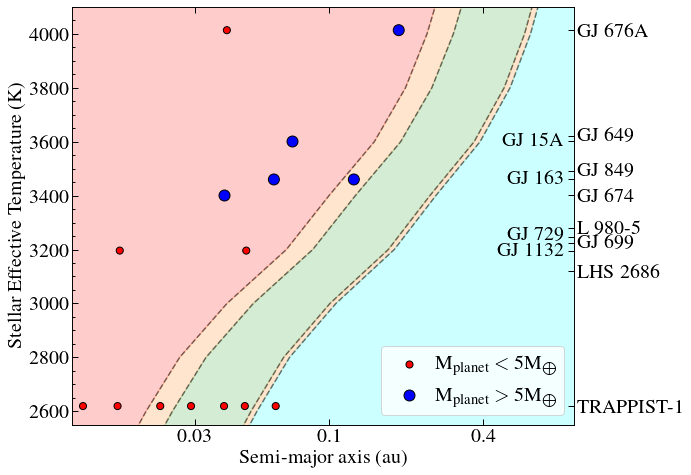

In [197]:
labels = ['Teff(K)', 'Recent Venus', 'Runaway Greenhouse', 'Maximum Greenhouse','Early Mars', '5ME Runaway  Greenhouse', '0.1ME Runaway Greenhouse']
                                              

fig, ax =plt.subplots(figsize=(10, 7), sharex=True, sharey=True)

tefflims = [2550, 4100]

columns = [1, 2, 3, 4]
cols = ['C3','C2', 'C2', 'C3']
fillcols=['r','C1', 'C2', 'C1']
hteffs = habz[:,0]
hlums = li(hteffs)
alast = np.full(len(hteffs), 0)
for i, col in enumerate(columns):
    s = habz[:,col]
    a = (hlums/s)**0.5
    plt.plot(a,hteffs, label = labels[col], c='k', ls='--', alpha=0.5)
    plt.fill_betweenx(hteffs, alast, a, color=fillcols[i], alpha=0.2)
    alast = a
plt.fill_betweenx(hteffs, alast, np.full(len(alast), 10), color='cyan', alpha=0.2)
    
    
    


t1 = [0.018942461658199808, 0.023992418349443854, 0.04864997693231791, 0.05131643030421871]
# [plt.axvline(line) for line in t1] 

plt.xlabel('Semi-major axis (au)')
plt.ylabel('Stellar Effective Temperature (K)')
plt.xscale('log')
# plt.yscale('log')
plt.ylim(tefflims[0], tefflims[1])
plt.xlim(0.01,0.9)
plt.xticks((0.03, 0.1, 0.4), (0.03, 0.1, 0.4))

#calculate the middle of the conservative HZ for a given teff.
hz_in, hz_out = habz[:,2], habz[:,3]
hz_ini = interpolate.interp1d(hteffs, hz_in)
hz_outi = interpolate.interp1d(hteffs, hz_out)
for teff in mm_params['Teff']:
    lum = li(teff)
    hi = (lum/hz_ini(teff))**0.5
    ho = (lum/hz_outi(teff))**0.5
#     plt.scatter(np.mean([hi, ho]), teff)

for star in mm_params['Target']:
    if star in planet_a:
        planets = planet_a[star]
        masses = planet_m[star]
        sizes  = [] #marker size scales with mass roughly
        cols = []
        for mass in masses: 
            if mass <=5:
                sizes.append(50)
                cols.append('r')
            else:
                sizes.append(120)
                cols.append('b')
        teff = mm_params['Teff'][mm_params['Target']==star]
        plt.scatter(planets, np.full(len(planets), teff), s=sizes, c=cols, edgecolor='k')


ax2 = ax.twinx()
ax2.tick_params(
    axis='y',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    right=False)      # ticks along the bottom edge are off   

teff_ticks = [2619, 3119, 3196, 3223, 3248, 3278, 3404, 3460, 3492, 3601, 3621, 4014]
tick_names = ['TRAPPIST-1', 'LHS 2686','' , 'GJ 699', '','L 980-5' , 'GJ 674','', 'GJ 849','' , 'GJ 649', 'GJ 676A']
skip_names = ['GJ 1132','GJ 729','GJ 163','GJ 15A']
skip_teffs = [3196,3248,3460, 3601]


ax2.set_yticks(teff_ticks, minor=False)
ax2.set_yticklabels(tick_names)
ax2.set_ylim(tefflims[0], tefflims[1])
[plt.annotate(name, (0.98,teff), xycoords=('axes fraction', 'data'), ha='right', va='center') for name, teff in zip(skip_names, skip_teffs)]

plt.scatter(10000, 10000, c='r', edgecolor='k', s=50, label = r'$\mathrm{M_{planet}} < 5\mathrm{M_{\bigoplus}}$')
plt.scatter(10000, 10000, c='b', edgecolor='k', s=120, label = r'$\mathrm{M_{planet}} > 5\mathrm{M_{\bigoplus}}$')

plt.legend(loc=4, frameon=True)
plt.tight_layout()
plt.savefig('plots/planets_hz.png', facecolor='w', dpi=150)
plt.savefig('plots/planets_hz.pdf', facecolor='w', dpi=150)

In [62]:
print(max(mm_params['Teff']))
print(min(mm_params['Teff']))

4014
2619


In [118]:
args = np.argsort(mm_params['Teff'])
print(np.array(mm_params['Teff'][args]))
print(np.array(mm_params['Target'][args]))

[2619 3119 3196 3223 3248 3278 3404 3460 3492 3601 3621 4014]
['Trappist-1' 'LHS 2686' 'GJ 1132' 'GJ 699' 'GJ 729' 'L 980-5' 'GJ 674'
 'GJ 163' 'GJ 849' 'GJ 15A' 'GJ 649' 'GJ 676A']
